(300,)


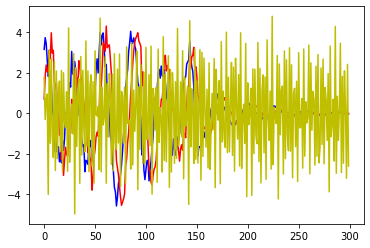

In [6]:
import numpy as np
import pandas as pd
import scipy.stats as stats


points = 300

sigma = 0.3 # mean and standard deviation
a = np.random.normal(1, sigma, points)
b = np.random.normal(3, sigma, points)

c_1 = np.ones(points//2)
c_2= np.array([1/np.sqrt(max(t,1)) for t in range(points//4)])
c_3= np.array([1/(t+4) for t in range(points//4)])

c = np.append(c_1, c_2)
c = np.append(c, c_3)

err = np.random.normal(0, sigma, points)




t = np.array(range(points))

frec1 = 5
frec2 =7


x1 = c*(a * np.sin(2*np.pi * (t/200) * frec1) + b * np.cos(2*np.pi * (t/200) * frec2) + err)

x2 = c*(a * np.sin(2*np.pi * ((t-5)/200) * frec1) + b * np.cos(2*np.pi * ((t-5)/200) * frec2) + err)

x3 = (a * np.sin(2*np.pi * ((t-5)/200) * 3 * frec1*3) + b * np.cos(2*np.pi * ((t-5)/200) * 3 * frec2*4) + err)


import matplotlib.pyplot as plt

print(x1.shape)

plt.plot(t,x1, color='b')
plt.plot(t,x2, color='r')
plt.plot(t,x3, color='y')
 

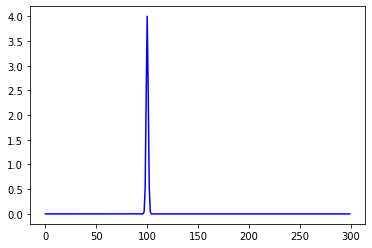

In [18]:
from scipy.stats import norm

def get_anomalous_array(index, value, window, sd, num_values):
    
    base = np.zeros(num_values)
    result = base
    
    for k in range(index - window, index + window):
        if k< num_values:
            result[k] = value * norm.pdf((k-index)/sd)/norm.pdf(0)   
    return np.array(result)

result = get_anomalous_array(100, 4, 40, 1,points)

plt.plot(t,result, color='b')

    
    
    


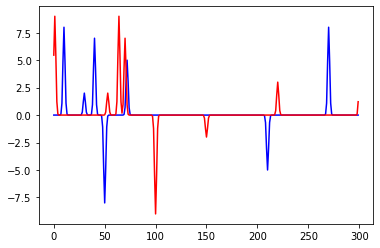

In [25]:
anomalous_indexes_1 = [10, 30, 40, 50, 72, 210, 270]
anomalous_values_1 = [8, 2, 7,-8, 5, -5, 8]

anomalous_indexes_2 = [1, 53, 64, 70, 100, 150, 220]
anomalous_values_2 = [9, 2, 9,7, -9, -2, 3]

perturbation_array_1 = np.zeros(points)
perturbation_array_2 = np.zeros(points)

window = 40

for i in range(len(anomalous_indexes_1)):
    perturbation_array_1 = perturbation_array_1 + get_anomalous_array(anomalous_indexes_1[i], anomalous_values_1[i], window, 1,points)
    perturbation_array_2 = perturbation_array_2 + get_anomalous_array(anomalous_indexes_2[i], anomalous_values_2[i], window, 1,points)




plt.plot(t,perturbation_array_1, color='b')
plt.plot(t,perturbation_array_2, color='r')


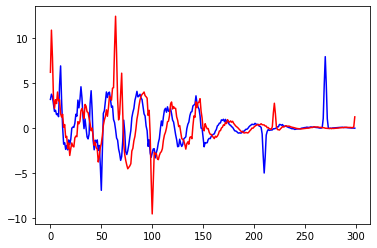

In [26]:

i1 = np.ones(points)
i2 = np.ones(points)
for i in range(len(anomalous_indexes_1)):
    i1[anomalous_indexes_1[i]] = anomalous_values_1[i]
    i2[anomalous_indexes_2[i]] = anomalous_values_2[i]
    

x1_perturbed = x1 + perturbation_array_1
x2_perturbed = x2 + perturbation_array_2


plt.plot(t,x1_perturbed, color='b')
plt.plot(t,x2_perturbed, color='r')